In [1]:
import pandas as pd
import openap
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

In [2]:
flight = pd.read_csv("data/flight_a320_qar.csv").query("ALTI_STD_FT>500")
flight.head()

,SYST_TRAJ_ID,FLPL_AIRC_TYPE,PLOT_DATE,FLIGHT_TIME,TIME_LAST_PLOT,ALTI_STD_FT,GRND_SPD_KT,VERT_SPD_FTMN,TRUE_AIR_SPD_KT,MASS_KG,FUEL_FLOW_KGH
576,ACPL0000,A320,2023-03-29 16:21:36,576.0,1.0,508.984375,170.000000,2547.734375,171.101462,69648.666336,3738.804673
577,ACPL0000,A320,2023-03-29 16:21:37,577.0,1.0,552.531250,170.000000,2528.867188,170.803395,69639.594486,3744.658847
578,ACPL0000,A320,2023-03-29 16:21:38,578.0,1.0,592.531250,170.000000,2525.664062,171.782003,69635.519241,3745.955838
579,ACPL0000,A320,2023-03-29 16:21:39,579.0,1.0,633.437500,169.644531,2573.398438,170.420757,69635.519241,3757.968944
580,ACPL0000,A320,2023-03-29 16:21:40,580.0,1.0,680.531250,169.000000,2602.265625,169.177884,69635.519241,3743.347683


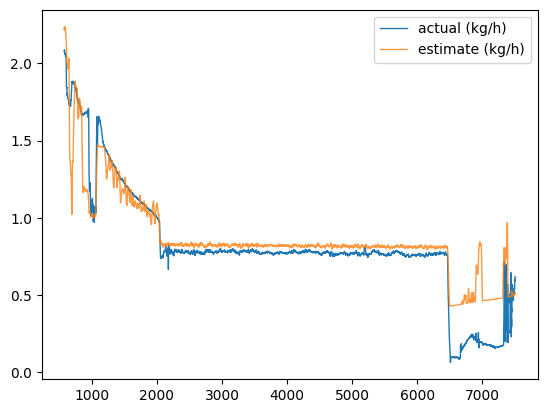

In [3]:
fuelflow = openap.FuelFlow("a320")


acc = (
    flight.TRUE_AIR_SPD_KT.diff().bfill()
    * openap.aero.kts
    / flight.FLIGHT_TIME.diff().bfill()
)

ff_estimate = fuelflow.enroute(
    mass=flight.MASS_KG,
    tas=flight.TRUE_AIR_SPD_KT,
    alt=flight.ALTI_STD_FT,
    vs=flight.VERT_SPD_FTMN,
)

plt.plot(
    flight.FLIGHT_TIME,
    flight.FUEL_FLOW_KGH * 2 / 3600,
    lw=1,
    label="actual (kg/h)",
)
plt.plot(
    flight.FLIGHT_TIME,
    ff_estimate,
    alpha=0.8,
    lw=1,
    label="estimate (kg/h)",
)
plt.legend()